In [6]:
import pytest
from matplotlib import pyplot as plt

from feynml import FeynmanDiagram, Leg, Propagator, Vertex
from pyfeyn2.render.all import AllRender, renders
from pyfeyn2.render.pyx.pyxrender import PyxRender
from pyfeyn2.render.latex.feynmp import FeynmpRender
from smpl_io import io

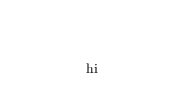

In [7]:
FeynmpRender().demo_propagator("phantom", show=True,label="hi",file="tmp.pdf")

\documentclass[preview,crop]{standalone}%
\usepackage[T1]{fontenc}%
\usepackage[utf8]{inputenc}%
\usepackage{lmodern}%
\usepackage{textcomp}%
\usepackage{lastpage}%
%
\usepackage{feynmp-auto}%
%
\begin{document}%
\normalsize%
\begin{fmffile}{tmp-802972ec5e3f4569b54323bc19b725bb}
\begin{fmfgraph*}(120,80)
		\fmfleft{l1,l2}
		\fmfright{l3,l4}
		\fmf{fermion}{l1,v1}
		\fmf{fermion}{l2,v1}
		\fmf{fermion}{v2,l3}
		\fmf{fermion}{v2,l4}
		\fmf{fermion}{v1,v2}
		\fmflabel{hi}{v1}
		\fmfv{decor.shape=square,decor.filled=full}{v1}
		\fmflabel{hi2}{v2}
		\fmfv{decor.shape=hexagram,decor.filled=full}{v2}
\end{fmfgraph*}
\end{fmffile}
%
\end{document}


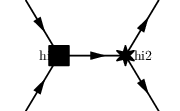

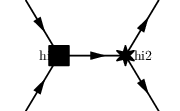

In [15]:
    fd = FeynmanDiagram()
    v1 = Vertex("v1").with_xy(-1, 0).with_shape('square').with_style("symbol-fill: full").with_label("hi")
    v2 = Vertex("v2").with_xy(1, 0).with_style("symbol: hexagram; symbol-fill: hatched; symbol-size").with_label("hi2")
    p1 = Propagator("p1").connect(v1, v2).with_type("fermion").with_style("momentum-arrow: true; momentum-arrow-sense: -1")
    l1 = Leg("l1").with_target(v1).with_xy(-2, 1).with_type("fermion").with_incoming()
    l2 = Leg("l2").with_target(v1).with_xy(-2, -1).with_type("fermion").with_incoming()
    l3 = Leg("l3").with_target(v2).with_xy(2, 1).with_type("fermion").with_outgoing()
    l4 = Leg("l4").with_target(v2).with_xy(2, -1).with_type("fermion").with_outgoing()
    p1.with_source(v1)
    p1.with_target(v2)
    fd.propagators.append(p1)
    fd.vertices.extend([v1, v2])
    fd.legs.extend([l1, l2, l3, l4])
    fr = FeynmpRender(fd)
    print(fr.get_src())
    fr.render(show=True)